In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recid = pd.read_csv("compas-scores-two-years.csv")

In [5]:
recid.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [6]:
recid.isnull().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

In [7]:
drop_columns = ['compas_screening_date', 'juv_fel_count',
                'juv_misd_count','c_case_number','vr_charge_degree',
                'vr_offense_date','vr_charge_desc','c_arrest_date',
                'r_case_number', 'vr_case_number','start',
                'juv_other_count','days_b_screening_arrest','c_days_from_compas', 'priors_count.1']
recid = recid.drop(drop_columns,axis=1)

In [8]:
recid.head()

,id,name,first,last,sex,dob,age,age_cat,race,decile_score,...,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,Male,1947-04-18,69,Greater than 45,Other,1,...,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,327,0,0
1,3,kevon dixon,kevon,dixon,Male,1982-01-22,34,25 - 45,African-American,3,...,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,159,1,1
2,4,ed philo,ed,philo,Male,1991-05-14,24,Less than 25,African-American,4,...,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,63,0,1
3,5,marcu brown,marcu,brown,Male,1993-01-21,23,Less than 25,African-American,8,...,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,Male,1973-01-22,43,25 - 45,Other,1,...,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,1102,0,0


**We are examining the cases where a convict's decile score labeled them as high risk and they did recidivate against the cases where their decile score classed them as high risk but they did not recidivate. A convict is defined as high risk if their score is five or above.**

In [9]:
#high risk convicts that ended up recidivating
recid[(recid.decile_score >= 5) & (recid.two_year_recid == 1)]['id'].count()

2035

In [10]:
#high risk convicts that ended up not recidivating
recid[(recid.decile_score >= 5) & (recid.two_year_recid == 0)]['id'].count()

1282

**The percentage of high risk offenders whose decile scores produced by COMPAS are accurate is 2035 / (2035+1282), meaning that the offender did recidivate when classified as high risk.**

**This is a rather low rate for an algorithm that predicts people's futures—roughly 61%.**
**We are examining situations where the criminal was classed as low risk and they did recidivate against cases where the convict was classified as low risk and they did not recidivate since a convict is considered low risk if their decile score is less than 5.**

In [11]:
recid[(recid.decile_score < 5) & (recid.two_year_recid == 1)]['id'].count()

1216

In [12]:
recid[(recid.decile_score < 5) & (recid.two_year_recid == 0)]['id'].count()

2681

**The percentage of low risk convicts for whom the decile scores produced by COMPAS are truly accurate is 2681 / (2681+1216), meaning that these convicts did not recidivate when classified as low risk.**

**The percentage is likewise rather low, at roughly 68.7%.**

In [13]:
recid.shape

(7214, 38)

In [14]:
recid.drop(['violent_recid'],axis=1).head()

,id,name,first,last,sex,dob,age,age_cat,race,decile_score,...,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,Male,1947-04-18,69,Greater than 45,Other,1,...,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,327,0,0
1,3,kevon dixon,kevon,dixon,Male,1982-01-22,34,25 - 45,African-American,3,...,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,159,1,1
2,4,ed philo,ed,philo,Male,1991-05-14,24,Less than 25,African-American,4,...,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,63,0,1
3,5,marcu brown,marcu,brown,Male,1993-01-21,23,Less than 25,African-American,8,...,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,Male,1973-01-22,43,25 - 45,Other,1,...,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,1102,0,0


In [15]:
recid.dtypes.head()

id        int64
name     object
first    object
last     object
sex      object
dtype: object

In [16]:
recid.dob = pd.to_datetime(recid['dob'])
recid.c_offense_date = pd.to_datetime(recid['c_offense_date'])

In [17]:
recid.dtypes.head()

id        int64
name     object
first    object
last     object
sex      object
dtype: object

In [18]:
recid.shape

(7214, 38)

In [20]:
recid.to_csv('compas_scores_two-years_clean.csv')

**Calculate Average Decile Score**

In [21]:
recid['Ave_score'] =(recid['v_decile_score']+recid['decile_score']+recid['decile_score.1'])/3

In [22]:
recid = recid.drop_duplicates(keep='first')

In [23]:
#values equal to the two year recidivism rate within each race
two_year_recid = recid.groupby('race')[['two_year_recid']].mean()
two_year_recid.sort_values(by = 'two_year_recid', ascending = False)

,two_year_recid
race,
Native American,0.555556
African-American,0.514340
Caucasian,0.393643
Hispanic,0.364207
Other,0.352785
Asian,0.281250


In [24]:
recid.groupby('age_cat')['two_year_recid'].mean()

age_cat
25 - 45            0.459723
Greater than 45    0.315990
Less than 25       0.565075
Name: two_year_recid, dtype: float64

In [25]:
numerical_recid = recid.select_dtypes(np.number).fillna(0)
numerical_recid.head()

,id,age,decile_score,priors_count,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,end,event,two_year_recid,Ave_score
0,1,69,1,0,0,0.0,0.0,0,1,1,327,0,0,1.000000
1,3,34,3,0,1,0.0,0.0,1,3,1,159,1,1,2.333333
2,4,24,4,4,1,0.0,0.0,0,4,3,63,0,1,3.666667
3,5,23,8,1,0,0.0,0.0,0,8,6,1174,0,0,7.333333
4,6,43,1,2,0,0.0,0.0,0,1,1,1102,0,0,1.000000


<Axes: >

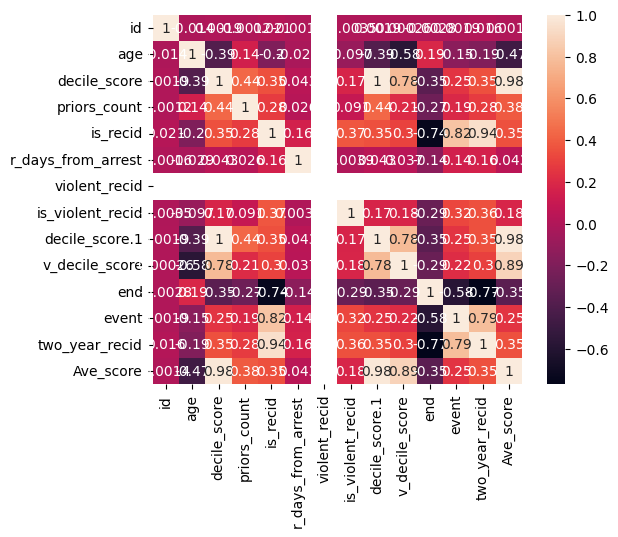

In [26]:
sns.heatmap(numerical_recid.corr(), annot = True, square = True)

**Age vs. decile score and age vs. recidivism**

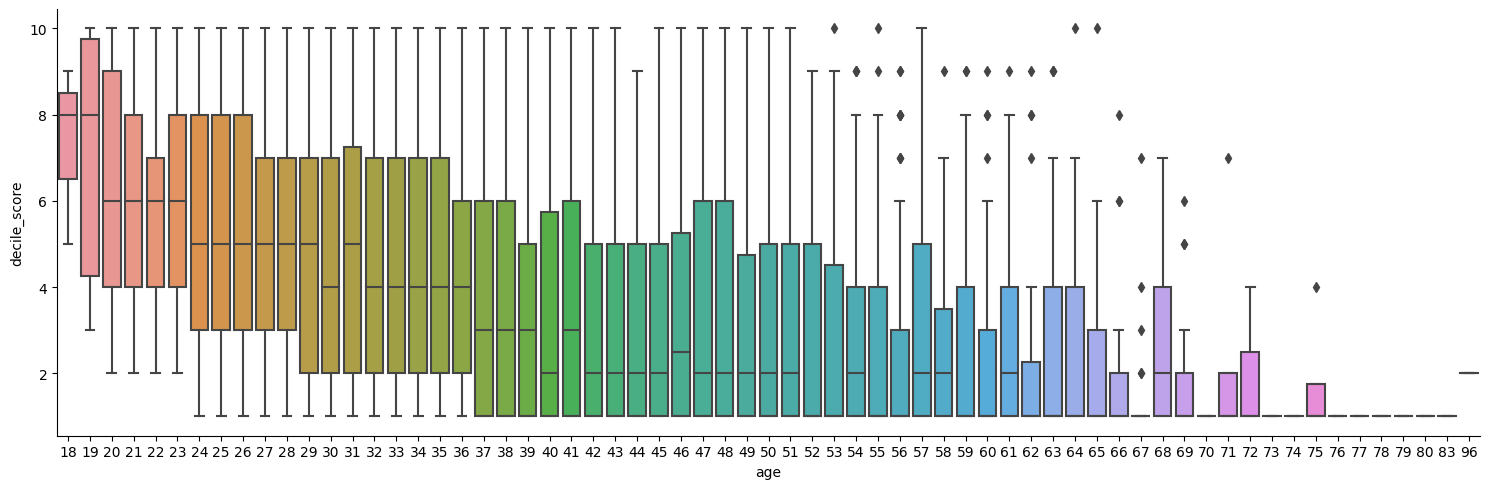

In [27]:
sns.catplot(data=recid, x='age', y='decile_score', kind = 'box', aspect = 3)

In [28]:
numerical_recid['age'].corr(numerical_recid['decile_score'])

-0.3877325537520373

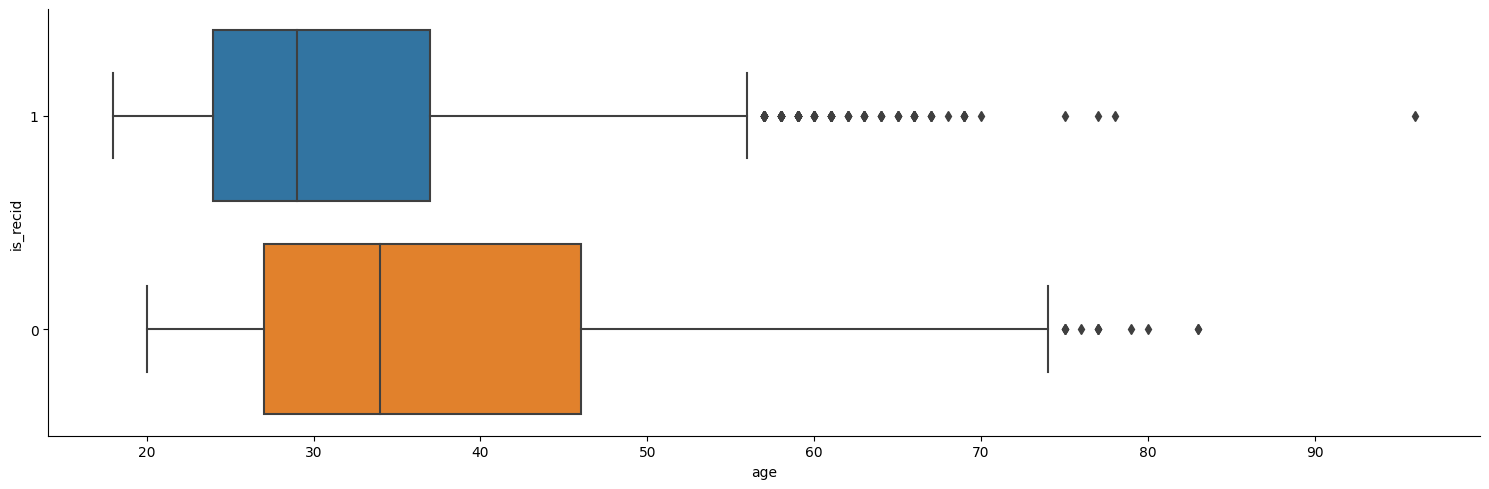

In [29]:
sns.catplot(data=recid, x='age', y='is_recid', aspect = 3, kind = 'box', orient = 'h', order = [1,0])

In [30]:
numerical_recid['age'].corr(numerical_recid['is_recid'])

-0.1973926979824961

**Decile score and recidivism compared by race**

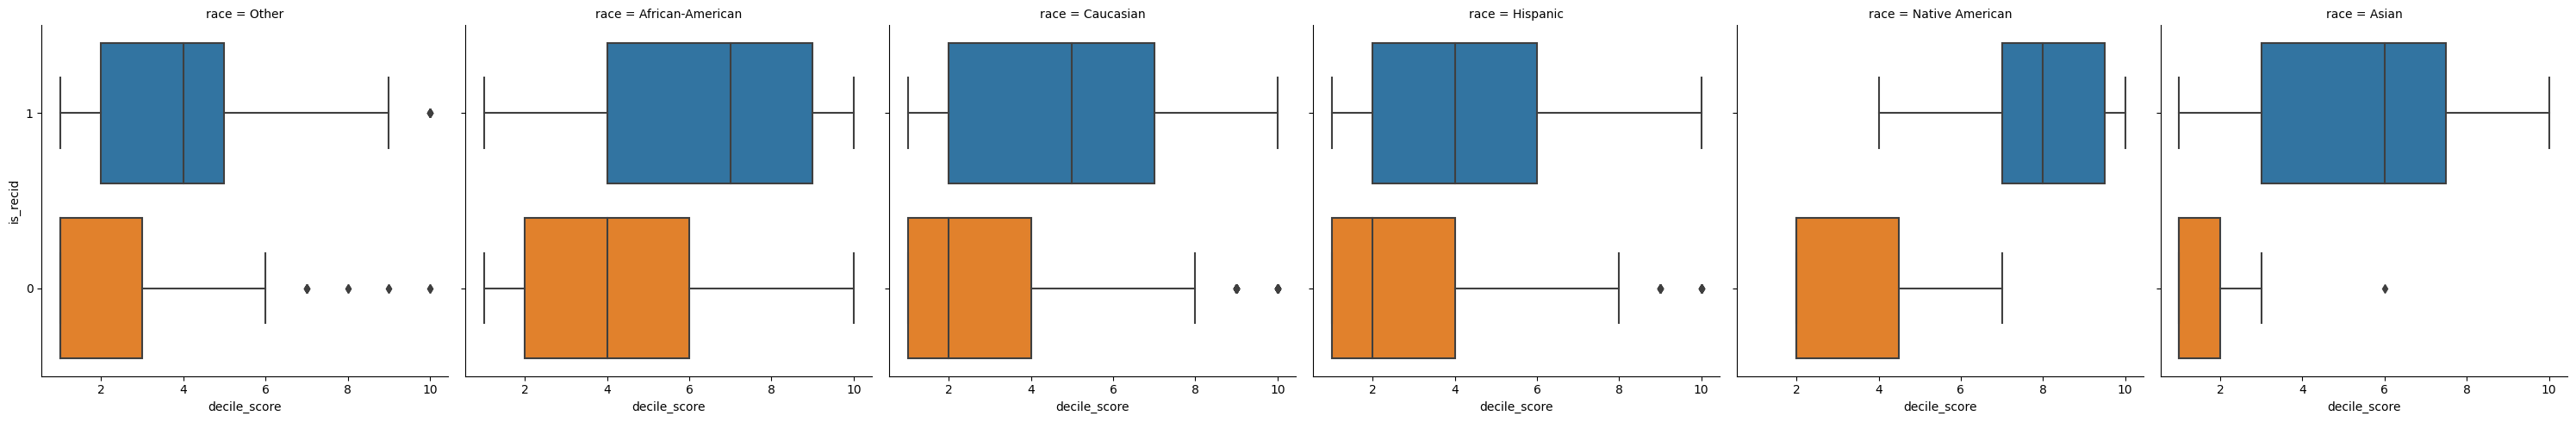

In [31]:
sns.catplot(x="decile_score", y='is_recid', data=recid, kind="box",
            col='race', orient ='h', order = [1,0], height = 5)

**This group by shows average decile score with average corresponding two year recid value.**

In [32]:
recid.groupby(['Ave_score'])['two_year_recid'].mean()

Ave_score
1.000000     0.203968
1.333333     0.271676
1.666667     0.298507
2.000000     0.312303
2.333333     0.340058
2.666667     0.368217
3.000000     0.375465
3.333333     0.392453
3.666667     0.399329
4.000000     0.396364
4.333333     0.480565
4.666667     0.535714
5.000000     0.539033
5.333333     0.567901
5.666667     0.513725
6.000000     0.573991
6.333333     0.605381
6.666667     0.601990
7.000000     0.658416
7.333333     0.664804
7.666667     0.728916
8.000000     0.688312
8.333333     0.676829
8.666667     0.720930
9.000000     0.746479
9.333333     0.761905
9.666667     0.805556
10.000000    0.750000
Name: two_year_recid, dtype: float64

**Correlation of Average Score and If they recidivated**

In [34]:
recid['two_year_recid'].corr(recid['Ave_score'])

0.351090467298788

**Hypothesis Test: Caucasian Recid vs. African American Recid**

Question: Do afican Amercians recitivate more than caucasians?

In [35]:
caucasian_recid = recid[recid.race == "Caucasian"].two_year_recid
caucasian_recid

6       1
8       0
9       1
10      0
12      0
       ..
7192    0
7194    1
7199    0
7205    1
7206    1
Name: two_year_recid, Length: 2454, dtype: int64

In [36]:
aa_recid = recid[recid.race == "African-American"].two_year_recid
aa_recid

1       1
2       1
3       0
11      1
13      0
       ..
7207    1
7208    0
7209    0
7210    0
7212    0
Name: two_year_recid, Length: 3696, dtype: int64

In [37]:
print("AA: \n" ,aa_recid.describe())
print("Caucasian: \n", caucasian_recid.describe())

AA: 
 count    3696.000000
mean        0.514340
std         0.499862
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: two_year_recid, dtype: float64
Caucasian: 
 count    2454.000000
mean        0.393643
std         0.488657
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: two_year_recid, dtype: float64


In [38]:
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats
tstat, pvalue, ddof = ttest_ind(
                                caucasian_recid,
                                aa_recid
)

In [39]:
print(pvalue,'\n', tstat,'\n',ddof)

1.1363681614744015e-20 
 -9.355920228380972 
 6148.0


**With sucha low p value, we are able to conclude that african americans recitivate more than caucasians.**

**Prior research revealed that African Americans experience higher rates of recidivation than do Caucasians. They ultimately end up recitivating at a higher rate, as we have just discovered.**

In [40]:
mid_age = recid[recid.age_cat == '25 - 45'].two_year_recid
under_25 = recid[recid.age_cat == 'Less than 25'].two_year_recid
tstat, pvalue, ddof = ttest_ind(
                                mid_age,
                                under_25
)

In [41]:
print(pvalue)

1.7943713406031512e-12
